In [1]:
# import "standard" packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# We'll use this thing called DummyClassifier
from sklearn.dummy import DummyClassifier

# We'll stick with logistic regression
from sklearn.linear_model import LogisticRegression

# Do we need to standardize or normalize?
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

# Need to be "good"
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import accuracy_score, recall_score, average_precision_score
from sklearn.metrics import plot_precision_recall_curve

In [2]:
# Read in the data and print out the .head()
NewLoanDF = pd.read_csv("NewLoanData.csv")
NewLoanDF.head()

,Income,Age,Experience,Risk Flag,Married/Single,Home Ownership,Car Ownership
0,1303834,23,3,0,0,0,0
1,7574516,40,10,0,0,0,0
2,3991815,66,4,0,1,0,0
3,6256451,41,2,1,0,0,1
4,5768871,47,11,1,0,0,0


In [3]:
#define X and y
X = NewLoanDF.drop('Risk Flag',axis=1)
y = NewLoanDF['Risk Flag']

In [4]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [5]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (201600, 6)
X_test shape: (50400, 6)


In [6]:
print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [176803  24797]


Text(0.5, 1.0, 'Dataset after oversampling')

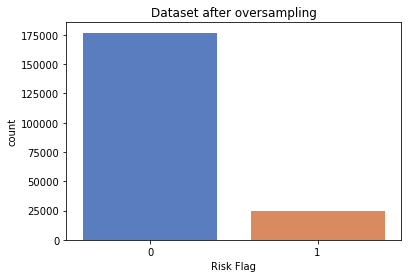

In [7]:
ax=sns.countplot(x = y_train, palette = 'muted')
ax.set_title('Dataset after oversampling')

In [8]:
# What is the default rate in training and test sets?
print(f"Training default rate is {y_train.mean():.2%}")
print(f"Test default rate is     {y_test.mean():.2%}")

Training default rate is 12.30%
Test default rate is     12.30%


In [9]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict= knn.predict(X_test)

In [11]:
print(f'Accuracy Score: {accuracy_score (y_test, knn_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, knn_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,knn_predict):.2f}')

Accuracy Score: 0.89
AUC Score: 0.72
F1 Score: 0.53


In [12]:
confusion_matrix(y_test, knn.predict(X_test))

array([[41682,  2519],
       [ 3058,  3141]], dtype=int64)

<AxesSubplot:>

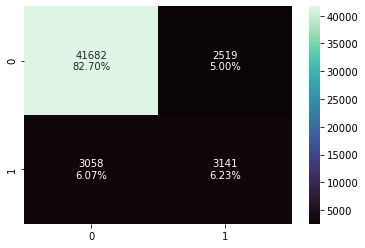

In [13]:
knn_cfm = confusion_matrix(y_test,knn_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                knn_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     knn_cfm.flatten()/np.sum(knn_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_cfm, annot=labels, fmt='', cmap='mako')

In [14]:
print(classification_report(y_test, knn.predict(X_test), 
                           target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.93      0.94      0.94     44201
         Yes       0.55      0.51      0.53      6199

    accuracy                           0.89     50400
   macro avg       0.74      0.72      0.73     50400
weighted avg       0.89      0.89      0.89     50400



## LOG Reg

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)

In [16]:
print(f'Accuracy Score: {accuracy_score (y_test, lr_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, lr_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,lr_predict):.2f}')

Accuracy Score: 0.88
AUC Score: 0.50
F1 Score: 0.00


In [17]:
confusion_matrix(y_test, lr.predict(X_test))

array([[44201,     0],
       [ 6199,     0]], dtype=int64)

<AxesSubplot:>

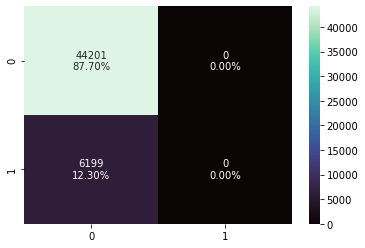

In [18]:
lr_cfm = confusion_matrix(y_test,lr_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                lr_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     lr_cfm.flatten()/np.sum(lr_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_cfm, annot=labels, fmt='', cmap='mako')

In [19]:
print(classification_report(y_test, lr.predict(X_test), 
                           target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.88      1.00      0.93     44201
         Yes       0.00      0.00      0.00      6199

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\aknig\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aknig\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aknig\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Accuracy 
print(f'accuracy of log reg: {accuracy_score(y_test,lr.predict(X_test)):.2%}')

accuracy of log reg: 87.70%


## Decision Tree 

In [21]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_predict = dct.predict(X_test)

In [22]:
print(f'Accuracy Score: {accuracy_score (y_test, dct_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, dct_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,dct_predict):.2f}')

Accuracy Score: 0.88
AUC Score: 0.75
F1 Score: 0.54


<AxesSubplot:>

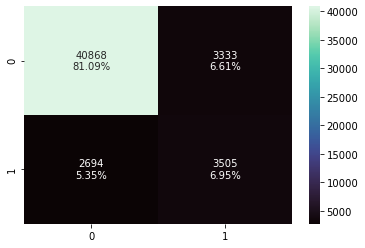

In [23]:
dct_cfm = confusion_matrix(y_test,dct_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                dct_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dct_cfm.flatten()/np.sum(dct_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dct_cfm, annot=labels, fmt='', cmap='mako')

In [24]:
print(classification_report(y_test, dct.predict(X_test), 
                           target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.94      0.92      0.93     44201
         Yes       0.51      0.57      0.54      6199

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.73     50400
weighted avg       0.89      0.88      0.88     50400

